In [11]:
#!pip install yfinance

In [12]:
#!pip install nltk

In [13]:
#!pip install vaderSentiment

In [14]:
#!pip install langdetect

In [15]:
from langdetect import detect
from dateutil import parser

In [156]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
import yfinance
import nltk
import vaderSentiment

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [64]:
apple=yfinance.Ticker("AAPL")

In [88]:
data=apple.history(period='1mo')

In [89]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-30 00:00:00-04:00,168.797615,170.944780,168.647803,170.065933,51131000,0.00,0.0
2023-10-31 00:00:00-04:00,169.127189,170.675137,167.679084,170.545319,44846000,0.00,0.0
2023-11-01 00:00:00-04:00,170.775011,174.000757,169.896164,173.741104,56934900,0.00,0.0
2023-11-02 00:00:00-04:00,175.289074,177.546095,175.229156,177.336380,77334800,0.00,0.0
2023-11-03 00:00:00-04:00,174.010754,176.587362,173.121926,176.417572,79763700,0.00,0.0
2023-11-06 00:00:00-05:00,176.147945,179.193920,175.978171,178.994186,63841300,0.00,0.0
2023-11-07 00:00:00-05:00,178.944239,182.199959,178.734524,181.580780,70530000,0.00,0.0
2023-11-08 00:00:00-05:00,182.110085,183.208629,181.351076,182.649368,49340300,0.00,0.0
2023-11-09 00:00:00-05:00,182.719278,183.877740,181.570782,182.169998,53763500,0.00,0.0


In [119]:
api_key='9dcab5d0d86940459623ec7dea5c8d36'
stock_symbol ="AAPL"

In [120]:
query_params = {
    'q': f'{stock_symbol}',
    'apiKey': api_key,
    'language': 'en',  # English language
    'country': 'us',   # USA sources
}


In [121]:
news_url = "https://newsapi.org/v2/everything"
response = requests.get(news_url, params=query_params)

In [122]:
import requests
from datetime import datetime, timedelta

# Define the date range for recent news (e.g., the last 7 days)
end_date = datetime.now()
start_date = end_date - timedelta(days=31)

# Format the dates in the required format (YYYY-MM-DD)
from_date = start_date.strftime("%Y-%m-%d")
to_date = end_date.strftime("%Y-%m-%d")

# Construct the News API URL
news_url = f"https://newsapi.org/v2/everything?q={stock_symbol}&apiKey={api_key}&from={from_date}&to={to_date}&language=en"

response = requests.get(news_url)

if response.status_code == 200:
    news_data = response.json()
    articles = news_data['articles']
    headlines = [(article['title'], article['publishedAt']) for article in articles]
else:
    print("Failed to retrieve news data.")

print(headlines)


[('AAPL Q4 2023: Analysts optimistic, despite warnings and negative signs', '2023-11-01T14:50:35Z'), ('AAPL share price dropped 11% since last earnings report', '2023-10-31T13:54:13Z'), ('Oppenheimer lowers AAPL target to $200 ahead of earnings', '2023-10-30T17:21:10Z'), ('9to5Mac Daily: November 3, 2023 –\xa0AAPL Q4 earnings, big-screen iMac dreams', '2023-11-03T18:38:31Z'), ("What to Expect From Apple's Earnings Report Tomorrow Following iPhone 15 Launch", '2023-11-01T20:02:33Z'), ('Goldman Sachs: New Macs position Apple well', '2023-10-31T16:30:41Z'), ('The Tell: Nobody on Wall Street wants to bet against the ‘Magnificent Seven’', '2023-11-08T21:28:00Z'), ('Earnings Results: Disney shares rise on huge increase in streaming users, improved earnings', '2023-11-08T21:25:00Z'), ('Market Extra: Technology stocks hit record high as Nasdaq looks to exit correction territory', '2023-11-14T18:08:00Z'), ("What to expect from Apple's Q4 2023 earnings report", '2023-10-30T20:46:15Z'), ('Market 

In [123]:
apple_related_headlines=[]

In [124]:
for headline, _ in headlines:
    try:
        date = parser.parse(_)
        if 'Apple' in headline:
            apple_related_headlines.append((headline, date))
    except ValueError:
        pass

In [125]:
apple_related_headlines.sort(key=lambda x: x[1])
for data in apple_related_headlines:
    print(f'Headline: {data[0]}\nDate: {data[1]}\n')

Headline: 米EPE、iMacを安全に発送できる「Apple iMac 24-/27-inch Desktop Computer Shipping Box」を発売。
Date: 2023-10-30 11:14:37+00:00

Headline: Stock market news today: US stocks rally as investors await Fed decision, Apple earnings
Date: 2023-10-30 20:40:07+00:00

Headline: What to expect from Apple's Q4 2023 earnings report
Date: 2023-10-30 20:46:15+00:00

Headline: MacDailyNews presents live coverage of Apple’s ‘Scary Fast’ special event
Date: 2023-10-30 21:05:27+00:00

Headline: Goldman Sachs: New Macs position Apple well
Date: 2023-10-31 16:30:41+00:00

Headline: Apple’s 3 New Chips: Everything You Need To Know
Date: 2023-10-31 17:22:13+00:00

Headline: Apple earnings: options market is pricing in 4.2% move in either direction
Date: 2023-10-31 19:24:36+00:00

Headline: 米Belkin、MagSafeに対応しiPhoneの15Wワイヤレス充電に加えApple Watchの高速充電にも対応した充電ステーション「BoostCharge Pro 2-in-1 Wireless Charging Dock」を発表。
Date: 2023-11-01 04:07:32+00:00

Headline: What to Expect From Apple's Earnings Report Tomorrow Following iP

In [126]:
df_apple_related_headlines = pd.DataFrame(apple_related_headlines, columns= ['Headlines', 'date'])

In [127]:
df_apple_related_headlines

,Headlines,date
0,米EPE、iMacを安全に発送できる「Apple iMac 24-/27-inch Desk...,2023-10-30 11:14:37+00:00
1,Stock market news today: US stocks rally as in...,2023-10-30 20:40:07+00:00
2,What to expect from Apple's Q4 2023 earnings r...,2023-10-30 20:46:15+00:00
3,MacDailyNews presents live coverage of Apple’s...,2023-10-30 21:05:27+00:00
4,Goldman Sachs: New Macs position Apple well,2023-10-31 16:30:41+00:00
5,Apple’s 3 New Chips: Everything You Need To Know,2023-10-31 17:22:13+00:00
6,Apple earnings: options market is pricing in 4...,2023-10-31 19:24:36+00:00
7,米Belkin、MagSafeに対応しiPhoneの15Wワイヤレス充電に加えApple W...,2023-11-01 04:07:32+00:00
8,What to Expect From Apple's Earnings Report To...,2023-11-01 20:02:33+00:00
9,Apple Third Quarter Results Completes Big Tech...,2023-11-02 20:54:14+00:00


In [128]:
df_unique_apple_related_headlines = df_apple_related_headlines.drop_duplicates(subset=['Headlines'])

In [129]:
df_unique_apple_related_headlines

,Headlines,date
0,米EPE、iMacを安全に発送できる「Apple iMac 24-/27-inch Desk...,2023-10-30 11:14:37+00:00
1,Stock market news today: US stocks rally as in...,2023-10-30 20:40:07+00:00
2,What to expect from Apple's Q4 2023 earnings r...,2023-10-30 20:46:15+00:00
3,MacDailyNews presents live coverage of Apple’s...,2023-10-30 21:05:27+00:00
4,Goldman Sachs: New Macs position Apple well,2023-10-31 16:30:41+00:00
5,Apple’s 3 New Chips: Everything You Need To Know,2023-10-31 17:22:13+00:00
6,Apple earnings: options market is pricing in 4...,2023-10-31 19:24:36+00:00
7,米Belkin、MagSafeに対応しiPhoneの15Wワイヤレス充電に加えApple W...,2023-11-01 04:07:32+00:00
8,What to Expect From Apple's Earnings Report To...,2023-11-01 20:02:33+00:00
9,Apple Third Quarter Results Completes Big Tech...,2023-11-02 20:54:14+00:00


In [139]:
analyzer = SentimentIntensityAnalyzer()
sentiments = []
neg_scores = []
neu_scores = []
pos_scores = []
compound_scores = []
for sentence in df_unique_apple_related_headlines['Headlines']:
    vs = analyzer.polarity_scores(sentence)
    sentiments.append(sentence)
    neg_scores.append(vs['neg'])
    neu_scores.append(vs['neu'])
    pos_scores.append(vs['pos'])
    compound_scores.append(vs['compound'])

In [140]:
sentiment_df = pd.DataFrame({
    'Headlines': sentiments,
    'Negative Score': neg_scores,
    'Neutral Score': neu_scores,
    'Positive Score': pos_scores,
    'Compound Score': compound_scores
})

In [145]:
sentiment_df.head()

,Headlines,Negative Score,Neutral Score,Positive Score,Compound Score
0,米EPE、iMacを安全に発送できる「Apple iMac 24-/27-inch Desk...,0.0,1.000,0.000,0.0000
1,Stock market news today: US stocks rally as in...,0.0,0.903,0.097,0.1027
2,What to expect from Apple's Q4 2023 earnings r...,0.0,1.000,0.000,0.0000
3,MacDailyNews presents live coverage of Apple’s...,0.0,0.769,0.231,0.4019
4,Goldman Sachs: New Macs position Apple well,0.0,0.741,0.259,0.2732


In [153]:
merged_df= pd.merge(df_unique_apple_related_headlines, sentiment_df, how="inner", on=["Headlines"])

In [154]:
merged_df

,Headlines,date,Negative Score,Neutral Score,Positive Score,Compound Score
0,米EPE、iMacを安全に発送できる「Apple iMac 24-/27-inch Desk...,2023-10-30 11:14:37+00:00,0.000,1.000,0.000,0.0000
1,Stock market news today: US stocks rally as in...,2023-10-30 20:40:07+00:00,0.000,0.903,0.097,0.1027
2,What to expect from Apple's Q4 2023 earnings r...,2023-10-30 20:46:15+00:00,0.000,1.000,0.000,0.0000
3,MacDailyNews presents live coverage of Apple’s...,2023-10-30 21:05:27+00:00,0.000,0.769,0.231,0.4019
4,Goldman Sachs: New Macs position Apple well,2023-10-31 16:30:41+00:00,0.000,0.741,0.259,0.2732
5,Apple’s 3 New Chips: Everything You Need To Know,2023-10-31 17:22:13+00:00,0.000,1.000,0.000,0.0000
6,Apple earnings: options market is pricing in 4...,2023-10-31 19:24:36+00:00,0.000,1.000,0.000,0.0000
7,米Belkin、MagSafeに対応しiPhoneの15Wワイヤレス充電に加えApple W...,2023-11-01 04:07:32+00:00,0.000,1.000,0.000,0.0000
8,What to Expect From Apple's Earnings Report To...,2023-11-01 20:02:33+00:00,0.000,1.000,0.000,0.0000
9,Apple Third Quarter Results Completes Big Tech...,2023-11-02 20:54:14+00:00,0.000,1.000,0.000,0.0000


In [165]:
print(data.index)

<built-in method index of tuple object at 0x000002442319A740>


TypeError: tuple indices must be integers or slices, not str

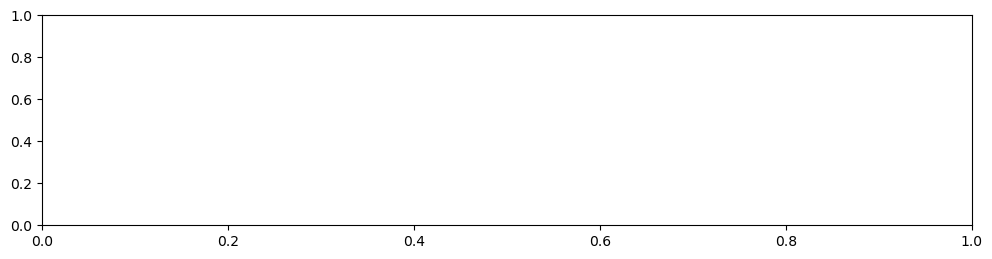

In [160]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(, data['Close'], label='AAPL Close Price')
plt.title('AAPL Stock Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_df['date'], merged_df['Compound Score'], label='Sentiment Score', color='orange')
plt.title('Sentiment Analysis of News Headlines')
plt.xlabel('Date')
plt.legend()

plt.tight_layout()
plt.show()